In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from disp import set_font_size


DT = .01

# define smln & obj function
def smlt(i_s, i_p, tau_r, tau_a, x_s, x_p):
    """Simulate response to song inputs."""
    t = np.arange(len(i_s))*DT
    r = np.nan*np.zeros(len(t))
    
    r[0] = 0
    a_s, a_p = 0, 0
    
    for ct, t_ in enumerate(t[1:], 1):
        a_s += ((DT/tau_a) * (-a_s + x_s*i_s[ct]))
        a_p += ((DT/tau_a) * (-a_p + x_p*i_p[ct]))
        r[ct] = r[ct-1] + (DT/tau_r) * (-r[ct-1] + (x_s - a_s)*i_s[ct] + (x_p - a_p)*i_p[ct])
    
    return r

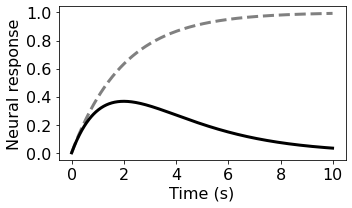

In [11]:
t = np.arange(0, 10, DT)
i_s = np.ones(len(t))
i_p = np.zeros(len(t))

r_0 = smlt(i_s, i_p, tau_r=2, tau_a=np.inf, x_s=1, x_p=0)
r_1 = smlt(i_s, i_p, tau_r=2, tau_a=2, x_s=1, x_p=0)


fig, ax = plt.subplots(1, 1, figsize=(5, 3), tight_layout=True)
ax.plot(t, r_0, ls='--', lw=3, c='gray')
ax.plot(t, r_1, lw=3, c='k')

ax.set_xlabel('Time (s)')
ax.set_ylabel('Neural response')

set_font_size(ax, 16)
fig.savefig('plots/cb_ms/time_constant_diag.svg')